In [19]:
import seaborn as sns

In [2]:
from smackbang.matches import get_matches

In [4]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [5]:
# Authentication
consumerKey = "PqA88zMUxSwVZi5hJpKdVKT4L"
consumerSecret = "WQ1xDXrygO4US93heMenGkj5z6DZeUQrZDIyoACAVZqtzulpPc"
accessToken = "1499085994561310727-p9J1gRV1tsLrVowGCvinw3lEvMHB5z"
accessTokenSecret = "zVxDSNXC8qmv2ZR5ZD6bE7rT0EmaRewTJxakYlQx89ncL"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [44]:
#Sentiment Analysis

def analyze_tweet(cities):
    noOfTweet = 200
    list_df= []
    for city in cities:      

        #tweets = tweepy.Cursor(api.search_tweets(), q=keyword).items(noOfTweet)
        tweets = api.search_tweets(q=city, count=noOfTweet)

        tweet_list = []

        for tweet in tweets:
            tweet_list.append(tweet.text)

        #Tweets to DF
        tweet_list = pd.DataFrame(tweet_list)

        #Clean the data
        tweet_list.drop_duplicates(inplace = True)
        tw_list = pd.DataFrame(tweet_list)

        #Make another column to compare
        tw_list["text"] = tw_list[0]

        #More cleaning
        remove_rt = lambda x: re.sub('RT @\w+:'," ",x)
        rt = lambda x: re.sub('(@[A-Za-z0–9]+)|(\w+:\/\/\S+)'," ",x)
        removen = lambda x: re.sub('\n',' ', x)
        tw_list["text"] = tw_list.text.map(remove_rt).map(rt).map(removen)
        tw_list["text"] = tw_list.text.str.lower()
  
        #I will try to simplify this
        tw_list[["polarity", "subjectivity"]] = tw_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
        for index, row in tw_list["text"].iteritems():
            score = SentimentIntensityAnalyzer().polarity_scores(row)
            neg = score["neg"]
            neu = score["neu"]
            pos = score["pos"]
            comp = score["compound"]
            if neg > pos:
                tw_list.loc[index, "sentiment"] = "negative"
            elif pos > neg:
                tw_list.loc[index, "sentiment"] = "positive"
            else:
                tw_list.loc[index, "sentiment"] = "neutral"
                tw_list.loc[index, "neg"] = neg
                tw_list.loc[index, "neu"] = neu
                tw_list.loc[index, "pos"] = pos
                tw_list.loc[index, "compound"] = comp
        print("This is for 2k tweets")
        plt.hist(tw_list["polarity"],bins=30)
        plt.show()
        def thumb(neg,neu,pos):
            if pos+(neu/2) >= neg+(neu/2):
                return "👍"
            else:
                return "👎"

        #Output a simplified DF
        def count_values_in_column(data,feature):
            #print(data)
            new_df = pd.DataFrame({"Score":["neutral","positive","negative"],"Total":[0,0,0], "Percentage":[0,0,0]})
            new_df.set_index("Score",inplace =True)
            new_df["Total"] = data.loc[:,feature].value_counts(dropna=False)
            new_df["Percentage"]=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
            new_df = new_df.fillna(0)           
            new_df["City"] = city
            new_df["Verdict"] = thumb(new_df["Total"].loc["negative"],
                                      new_df["Total"].loc["neutral"], 
                                      new_df["Total"].loc["positive"])
            list_df.append(new_df)
            #print(new_df)


        #Count_values for sentiment
        count_values_in_column(tw_list,"sentiment")
    result =  pd.concat(list_df)
    
        #test analysis
    test = result.drop(columns=["Verdict"])
    return test
    #return result.reset_index(drop=True).drop(columns=["Total","Percentage"]).drop_duplicates()


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
This is for 2k tweets


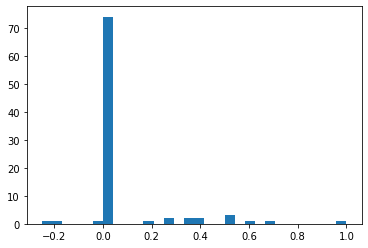

This is for 2k tweets


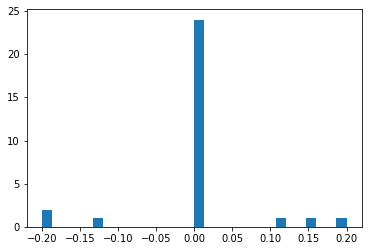

This is for 2k tweets


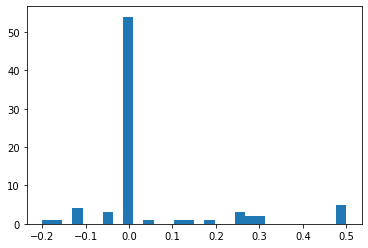

This is for 2k tweets


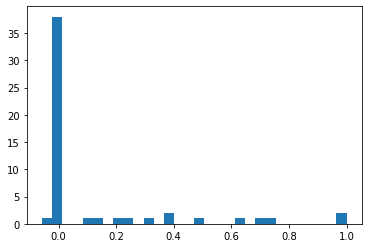

This is for 2k tweets


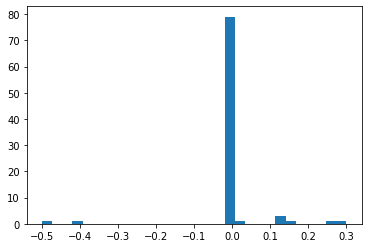

This is for 2k tweets


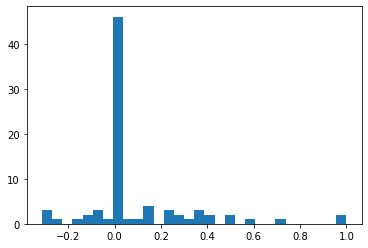

This is for 2k tweets


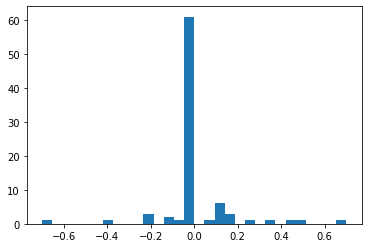

This is for 2k tweets


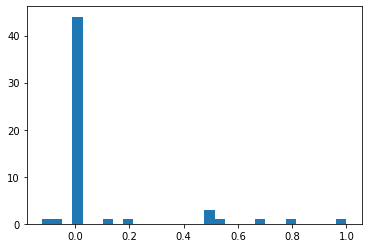

,Total,Percentage,City
Score,,,
neutral,66,73.33,Jakarta
positive,18,20.00,Jakarta
negative,6,6.67,Jakarta
neutral,25,83.33,Kuala Lumpur
positive,3,10.00,Kuala Lumpur
negative,2,6.67,Kuala Lumpur
neutral,39,49.37,Berlin
positive,21,26.58,Berlin
negative,19,24.05,Berlin


In [43]:
%time
analyze_tweet(["Jakarta","Kuala Lumpur","Berlin","Seoul","Osaka","Brussels","Frankfurt","Amsterdam"])

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.9 µs
This is for 2k tweets


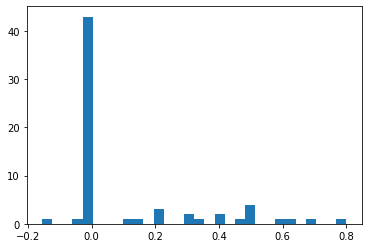

This is for 2k tweets


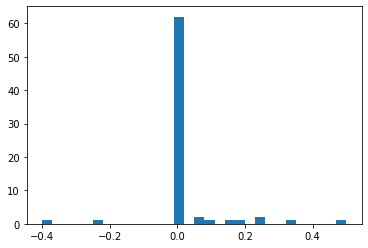

This is for 2k tweets


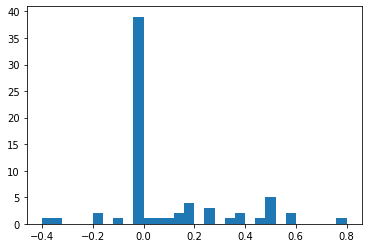

This is for 2k tweets


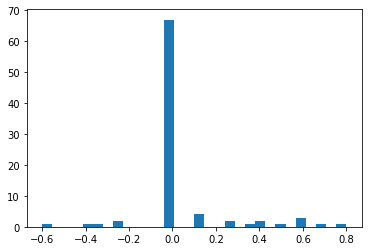

This is for 2k tweets


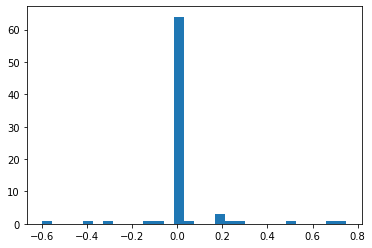

This is for 2k tweets


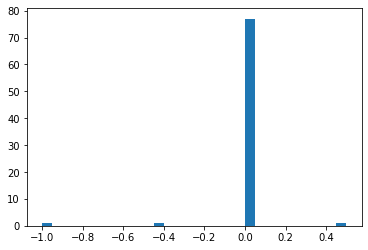

This is for 2k tweets


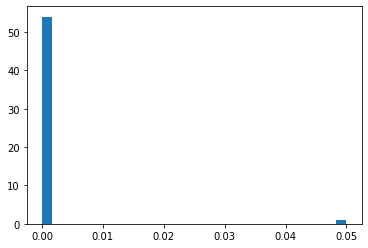

This is for 2k tweets


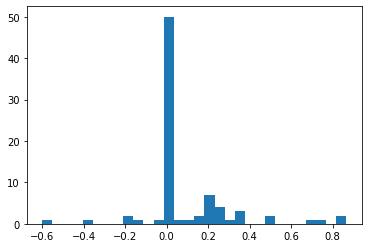

,Total,Percentage,City
Score,,,
neutral,40.0,62.50,Phuket
positive,17.0,26.56,Phuket
negative,7.0,10.94,Phuket
neutral,44.0,60.27,Mexico
positive,4.0,5.48,Mexico
negative,25.0,34.25,Mexico
neutral,35.0,51.47,Brazil
positive,19.0,27.94,Brazil
negative,14.0,20.59,Brazil


In [45]:
%time
analyze_tweet(["Phuket","Mexico","Brazil","Puerto Rico","Venezuela","Colombia","Kyoto","Capetown"])

In [12]:
d = analyze_tweet(["Japan","Russia","Istanbul","Manila"])

In [20]:
d.reset_index()

,Score,Total,Percentage,City
0,neutral,61,77.22,Japan
1,positive,12,15.19,Japan
2,negative,6,7.59,Japan
3,neutral,24,26.67,Russia
4,positive,25,27.78,Russia
5,negative,41,45.56,Russia
6,neutral,76,96.20,Istanbul
7,positive,1,1.27,Istanbul
8,negative,2,2.53,Istanbul
9,neutral,37,50.68,Manila


In [ ]:
sns

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

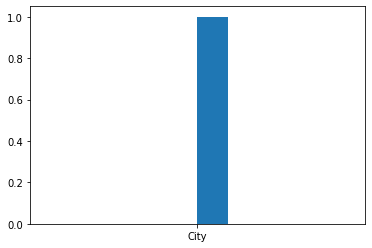

In [16]:
plt.hist(x ="City",label="Score")